# Preprocessing
---

In [1]:
import pandas as pd

In [45]:
# func 모음

# 1. 종목코드를 6자리로 통일. ex) 990 -> 000990
def padding(x):
    x = str(x)
    return x.rjust(6, "0")

# 2. 결산월 12월인 것만 선택
# : 전체 데이터 4963개 중에서 12월 결산인 데이터가 4836개이다. 나머지 결산월의 데이터가 전체의 2.5%로 데이터량이 작기도하고 결측치가 많아 제거
def func_yearin(x):
    if x[5:7] == '12':
        return True
    else:
        return False

# 3. 회계년도컬럼, 년도만 뽑아서 int화
def change_year(x):
    return int(x[:4])

---
## 주가 상승 확인

In [21]:
# df[df["회사명"]=="LG이노텍(주)"]
# (주)경인양행 2015-2016
# (주)금비 2014-2015
# LG이노텍(주) 2013-2014
# 기간 : 02.01 ~ 03.30

,회사명,거래소코드,회계년도,이자보상배율(이자비용),이자보상배율(순금융비용)
11223,LG이노텍(주),11070,2011,-0.75,-1.340000e+00
11224,LG이노텍(주),11070,2012,0.00,4.800000e-01
11225,LG이노텍(주),11070,2013,0.30,1.400000e-01
11226,LG이노텍(주),11070,2014,3.34,3.010000e+00
11227,LG이노텍(주),11070,2015,4.20,2.420000e+00
11228,LG이노텍(주),11070,2016,2.07,1.380000e+01
11229,LG이노텍(주),11070,2017,8.86,2.739000e+01
11230,LG이노텍(주),11070,2018,4.34,1.128000e+01
11231,LG이노텍(주),11070,2019,6.77,1.000000e+09


In [4]:
df_LG이노텍 = pd.read_csv("./datasets/raw/LG이노텍_20140201_20150331.csv", index_col="날짜")
df_LG이노텍.sort_values(by="날짜", ascending=True, inplace=True)
df_LG이노텍

,종가,오픈,고가,저가,거래량,변동 %
날짜,,,,,,
2014- 02- 03,"84,700","83,800","85,000","82,500",127.94K,-0.35%
2014- 02- 04,"84,100","82,800","84,600","82,800",84.75K,-0.71%
2014- 02- 05,"83,300","84,300","84,800","82,600",80.49K,-0.95%
2014- 02- 06,"83,800","83,200","84,900","83,200",80.42K,0.60%
2014- 02- 07,"86,500","84,100","86,900","84,100",153.49K,3.22%
...,...,...,...,...,...,...
2015- 03- 25,"111,000","115,000","116,000","110,500",173.13K,-3.48%
2015- 03- 26,"111,000","109,000","112,000","108,500",144.55K,0.00%
2015- 03- 27,"114,500","111,000","115,000","110,500",172.27K,3.15%


/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_72296/2254020895.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: xlabel='날짜'>

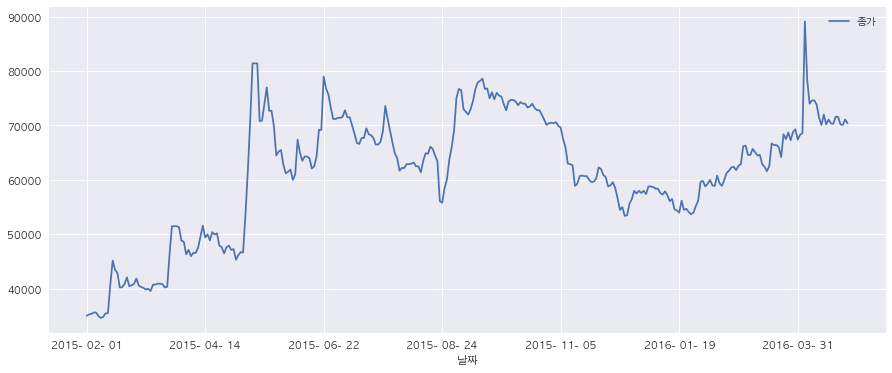

In [45]:
df_금비 = pd.read_csv("./datasets/raw/금비_20150201_20160430.csv", index_col="날짜")
df_금비.sort_values(by="날짜", ascending=True, inplace=True)

def func_replace(x):
    return int(x.replace(",",""))

df_금비["종가"] = df_금비["종가"].map(func_replace)

import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

df_금비.plot(y = ['종가'], figsize = [15,6], grid = True)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_72296/550950680.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: xlabel='날짜'>

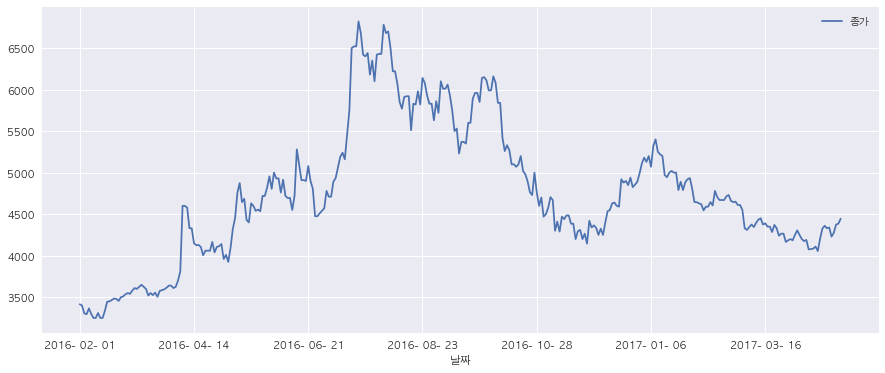

In [46]:
df_경인양행 = pd.read_csv("./datasets/raw/경인양행_20160201_20170430.csv", index_col="날짜")
df_경인양행.sort_values(by="날짜", ascending=True, inplace=True)

def func_replace(x):
    return int(x.replace(",",""))

df_경인양행["종가"] = df_경인양행["종가"].map(func_replace)

import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

df_경인양행.plot(y = ['종가'], figsize = [15,6], grid = True)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14400/4065861212.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: xlabel='날짜'>

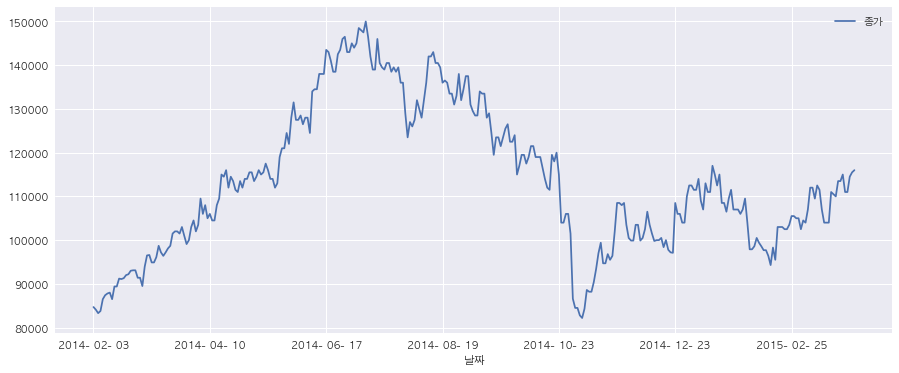

In [19]:
df_LG이노텍 = pd.read_csv("./datasets/raw/LG이노텍_20140201_20150331.csv", index_col="날짜")
df_LG이노텍.sort_values(by="날짜", ascending=True, inplace=True)

def func_replace(x):
    return int(x.replace(",",""))

df_LG이노텍["종가"] = df_LG이노텍["종가"].map(func_replace)

import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

df_LG이노텍.plot(y = ['종가'], figsize = [15,6], grid = True)

---
## 부실징후기업 전처리

### 1. 부실징후기업 Labeling

In [72]:
df = pd.read_csv("./datasets/raw/사업보고서.csv", encoding="CP949")
df["거래소코드"] = df["거래소코드"].map(padding)
df = df[df["회계년도"].map(func_yearin)]
df["회계년도"] = df["회계년도"].map(change_year)
df

,회사명,거래소코드,회계년도,총자본증가율(IFRS연결),유형자산증가율(IFRS연결),비유동생물자산증가율(IFRS연결),투자부동산증가율(IFRS연결),비유동자산증가율(IFRS연결),유동자산증가율(IFRS연결),재고자산증가율(IFRS연결),...,인건비(IFRS연결)(백만원),금융비용(IFRS연결)(백만원),임차료(IFRS연결)(백만원),세금과공과(IFRS연결)(백만원),감가상각비(IFRS연결)(백만원),종업원1인당 부가가치(IFRS연결)(백만원).1,총자본투자효율(IFRS연결).1,기계투자효율(IFRS연결).1,부가가치율(IFRS연결).1,종업원수(IFRS연결)
0,(주)CMG제약,058820,2011,1.98,-5.90,0.0,0.00,-12.89,17.64,-1.43,...,0.0,1344.09,NaN,12.72,1.285100e+02,19.56,NaN,NaN,NaN,NaN
1,(주)CMG제약,058820,2012,109.15,-4.12,0.0,0.00,-16.43,207.08,7.73,...,0.0,1404.34,NaN,0.47,1.067000e+01,1.66,NaN,NaN,NaN,NaN
2,(주)CMG제약,058820,2013,-2.09,16.09,0.0,0.00,77.05,-18.89,56.29,...,0.0,1116.14,NaN,12.51,2.894000e+02,34.29,NaN,NaN,NaN,NaN
3,(주)CMG제약,058820,2014,3.86,74.30,0.0,0.00,68.15,-25.93,6.37,...,0.0,1464.84,NaN,12.16,1.320600e+02,31.04,NaN,NaN,NaN,NaN
4,(주)CMG제약,058820,2015,-2.64,-5.37,0.0,0.00,1.66,-7.17,11.04,...,0.0,1890.05,NaN,7.63,9.092000e+01,15.96,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17822,흥아해운(주),003280,2015,21.93,49.36,0.0,7.85,32.18,-11.18,-12.92,...,0.0,18964.51,NaN,13.11,3.459744e+09,12.28,NaN,NaN,NaN,NaN
17823,흥아해운(주),003280,2016,21.08,38.84,0.0,2.88,30.68,-25.08,56.39,...,0.0,25157.71,NaN,10.98,3.509713e+09,12.66,NaN,NaN,NaN,NaN
17824,흥아해운(주),003280,2017,-11.43,-16.50,0.0,-11.63,-14.38,13.29,11.18,...,0.0,27508.83,NaN,5.43,1.535742e+09,5.51,NaN,NaN,NaN,NaN
17825,흥아해운(주),003280,2018,-5.33,-12.07,0.0,70.56,-5.17,-6.33,-5.85,...,0.0,24326.58,NaN,4.24,1.135163e+09,4.52,NaN,NaN,NaN,NaN


In [73]:
def func_company_filter(x): # 이자보상배율이 1미만인 데이터가 최소 1개 있는 기업들(부실징후기업대상)
    if x in list_부실징후기업후보:
        return True
    else:
        return False
    
df = df[df["거래소코드"].map(func_company_filter)]
print(df.shape)
list(df["회계년도"].unique())
# df.to_csv("./datasets/data_12월결산+대상기업.csv")

(4788, 152)


[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

#### 1-1. 이자보상배율 df 생성

In [74]:
df_이자보상배율_9년_10년 = pd.read_csv("./datasets/raw/이자보상배율_9년_10년.csv", encoding="CP949")
df_이자보상배율_9년_10년["거래소코드"] = df_이자보상배율_9년_10년["거래소코드"].map(padding)
df_이자보상배율_9년_10년 = df_이자보상배율_9년_10년[df_이자보상배율_9년_10년["회계년도"].map(func_yearin)]
df_이자보상배율_9년_10년["회계년도"] = df_이자보상배율_9년_10년["회계년도"].map(change_year)
df_이자보상배율_9년_10년 = df_이자보상배율_9년_10년[df_이자보상배율_9년_10년["거래소코드"].map(func_company_filter)]
df_이자보상배율_9년_10년.columns = ['회사명', '거래소코드', '회계년도', '이자보상배율']
df_이자보상배율_9년_10년

,회사명,거래소코드,회계년도,이자보상배율
0,(주)CMG제약,058820,2009,-8.29
1,(주)CMG제약,058820,2010,-7.33
2,(주)DB하이텍,000990,2009,-0.76
3,(주)DB하이텍,000990,2010,-2.80
6,(주)HJ중공업,097230,2009,2.57
...,...,...,...,...
3479,효성아이티엑스(주),094280,2010,3.29
3484,휴림로봇(주),090710,2009,-3.04
3485,휴림로봇(주),090710,2010,3.56
3490,흥아해운(주),003280,2009,-0.47


In [75]:
df_이자보상배율 = df[["회사명","거래소코드","회계년도","이자보상배율(이자비용)(IFRS연결)"]]
df_이자보상배율.columns = ['회사명', '거래소코드', '회계년도', '이자보상배율']
df_이자보상배율

,회사명,거래소코드,회계년도,이자보상배율
0,(주)CMG제약,058820,2011,-13.96
1,(주)CMG제약,058820,2012,-2.49
2,(주)CMG제약,058820,2013,10.17
3,(주)CMG제약,058820,2014,9.80
4,(주)CMG제약,058820,2015,4.70
...,...,...,...,...
17822,흥아해운(주),003280,2015,16.85
17823,흥아해운(주),003280,2016,13.70
17824,흥아해운(주),003280,2017,6.56
17825,흥아해운(주),003280,2018,-1.49


In [76]:
df_이자보상배율 = pd.concat([df_이자보상배율_9년_10년,df_이자보상배율], axis=0)
df_이자보상배율.sort_values(by=["거래소코드","회계년도"],inplace=True)
df_이자보상배율.isna().sum() # 1316행 제거(1305-11~19)
df_이자보상배율.dropna(axis=0, inplace=True)
df_이자보상배율

,회사명,거래소코드,회계년도,이자보상배율
3143,케이알모터스(주),000040,2009,-2.81
3144,케이알모터스(주),000040,2010,3.74
16202,케이알모터스(주),000040,2011,6.82
16203,케이알모터스(주),000040,2012,0.95
16204,케이알모터스(주),000040,2013,-2.01
...,...,...,...,...
14232,애머릿지코퍼레이션,900100,2015,22.74
14233,애머릿지코퍼레이션,900100,2016,35.72
14234,애머릿지코퍼레이션,900100,2017,64.40
14235,애머릿지코퍼레이션,900100,2018,64.43


#### 1-2. 이자보상배율이 1미만인 데이터가 최소 1개 이상 있는 기업들을 대상으로 라벨링

In [77]:
list_부실징후기업후보 = list(df_이자보상배율[df_이자보상배율["이자보상배율"]<1]["거래소코드"].unique())
print(len(list_부실징후기업후보))

542


In [78]:
df_이자보상배율.shape

(4511, 4)

In [79]:
def func_company_filter(x):
    if x in list_부실징후기업후보:
        return True
    else:
        return False
    
df_이자보상배율 = df_이자보상배율[df_이자보상배율["거래소코드"].map(func_company_filter)]
df_이자보상배율

,회사명,거래소코드,회계년도,이자보상배율
3143,케이알모터스(주),000040,2009,-2.81
3144,케이알모터스(주),000040,2010,3.74
16202,케이알모터스(주),000040,2011,6.82
16203,케이알모터스(주),000040,2012,0.95
16204,케이알모터스(주),000040,2013,-2.01
...,...,...,...,...
14232,애머릿지코퍼레이션,900100,2015,22.74
14233,애머릿지코퍼레이션,900100,2016,35.72
14234,애머릿지코퍼레이션,900100,2017,64.40
14235,애머릿지코퍼레이션,900100,2018,64.43


#### 1-2. 이자보상배율 이상치대체
- 999999999 너무 많음
- 이자보상배율이 "영업이익/이자비용"으로 계산되는데 이자비용이 0인 기업은 inf값이 아니라 999999999로 계산된다. -> 대체필요

In [80]:
df_이자보상배율[df_이자보상배율["이자보상배율"]>999999990]

,회사명,거래소코드,회계년도,이자보상배율
2115,경인전자(주),009140,2010,999999999.0
2482,비케이탑스(주),030790,2009,999999999.0
1821,(주)판타지오,032800,2010,999999999.0
73,(주)그래디언트,035080,2010,999999999.0
2769,에스씨아이평가정보(주),036120,2009,999999999.0
48,(주)골드퍼시픽,038530,2009,999999999.0
49,(주)골드퍼시픽,038530,2010,999999999.0
3020,인포뱅크(주),039290,2010,999999999.0
489,(주)블루베리엔에프티,044480,2009,999999999.0
1954,(주)한빛소프트,047080,2009,999999999.0


In [81]:
# winsorizing을 이용한 이상치 대체 방법
from scipy.stats.mstats import winsorize
퍼센트=0.01 # 위아래 각각 0.5%씩 대체
df_이자보상배율["이자보상배율"] = winsorize(df_이자보상배율["이자보상배율"], limits=[퍼센트/2, 퍼센트/2])

In [87]:
df_이자보상배율.sort_values(by="이자보상배율", ascending=False).head(5)

,회사명,거래소코드,회계년도,이자보상배율
14753,에이피티씨(주),089970,2019,102.51
13406,샘표(주),007540,2016,102.51
2769,에스씨아이평가정보(주),036120,2009,102.51
2115,경인전자(주),009140,2010,102.51
48,(주)골드퍼시픽,038530,2009,102.51


In [82]:
# 이상치 확인을 위한 boxplot 그리기 전 초기작업
import seaborn as sns #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_85398/289675185.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


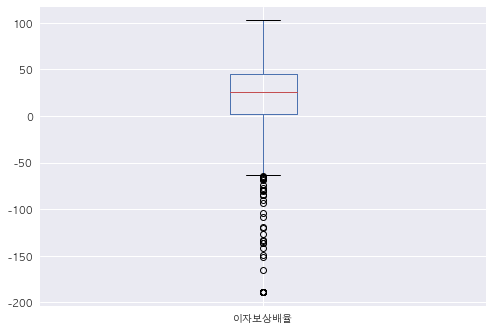

In [83]:
%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

df_이자보상배율[["이자보상배율"]].boxplot()
    
plt.show()

<AxesSubplot: xlabel='이자보상배율'>

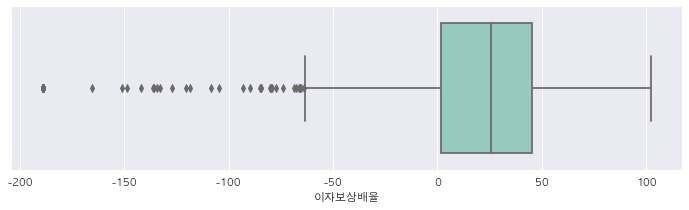

In [85]:
# 이상치 확인
import seaborn as sns
target = "이자보상배율"

plt.figure(figsize=(12,3))
sns.boxplot(x=target, data=df_이자보상배율, palette="Set3")
# sns.swarmplot(data=df_이자보상배율, x=target)

#### 1-3. 부실징후기업 Labeling

In [91]:
df_이자보상배율

,회사명,거래소코드,회계년도,이자보상배율
3143,케이알모터스(주),000040,2009,-2.81
3144,케이알모터스(주),000040,2010,3.74
16202,케이알모터스(주),000040,2011,6.82
16203,케이알모터스(주),000040,2012,0.95
16204,케이알모터스(주),000040,2013,-2.01
...,...,...,...,...
14232,애머릿지코퍼레이션,900100,2015,22.74
14233,애머릿지코퍼레이션,900100,2016,35.72
14234,애머릿지코퍼레이션,900100,2017,64.40
14235,애머릿지코퍼레이션,900100,2018,64.43
